### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [4]:
print(type(tienda4))

<class 'pandas.core.frame.DataFrame'>


Se crea una lista que contiene los data frames de las tiendas y otra que contiene los identificadores de cada data frame

In [5]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']



In [6]:
type(tiendas)

list

Añadir la categoria de tienda y crear un data frame agrupado con las 4 tiendas

In [7]:
for i in range(len(tiendas)):
    tiendas[i]['tienda'] = nombres_tienda[i]

ventas_total = pd.concat(tiendas, ignore_index=True)

In [8]:
ventas_total.head(100)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Microondas,Electrodomésticos,722600.0,36700.0,30/09/2021,Ángel Rodriguez,Cúcuta,5,Nequi,1,7.89391,-72.50782,Tienda 1
96,Olla de presión,Artículos para el hogar,78300.0,4600.0,27/09/2022,Mariana Herrera,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250,Tienda 1
97,Mesa de comedor,Muebles,279300.0,15300.0,03/05/2022,Santiago Silva,Bogotá,2,Tarjeta de crédito,6,4.60971,-74.08175,Tienda 1
98,Bicicleta,Deportes y diversión,475100.0,23500.0,13/12/2020,Juan Fernandez,Medellín,5,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1


Se verifican los registros por cada data frame

In [9]:
tienda.shape
tienda2.shape
tienda3.shape
tienda4.shape

(2358, 13)

In [10]:
tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 4
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782,Tienda 4
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 4
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359,Tienda 4
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175,Tienda 4


#1. Análisis de facturación



Se calculan los ingresos totales de cada tienda

In [11]:
ingresos_totales = []

for tienda, nombre in zip(tiendas, nombres_tienda):
    ingresos_tienda = tienda['Precio'].sum()
    ingresos_totales.append(ingresos_tienda)
    print('Los ingresos totales de la tienda %s, son %.2f' %(nombre, ingresos_tienda))

Los ingresos totales de la tienda Tienda 1, son 1150880400.00
Los ingresos totales de la tienda Tienda 2, son 1116343500.00
Los ingresos totales de la tienda Tienda 3, son 1098019600.00
Los ingresos totales de la tienda Tienda 4, son 1038375700.00


Se genera un gráfico de los ingresos por tienda a partir de un data frame que agurpa la lista de los data frame de cada tienda y sus respectivos identificadores

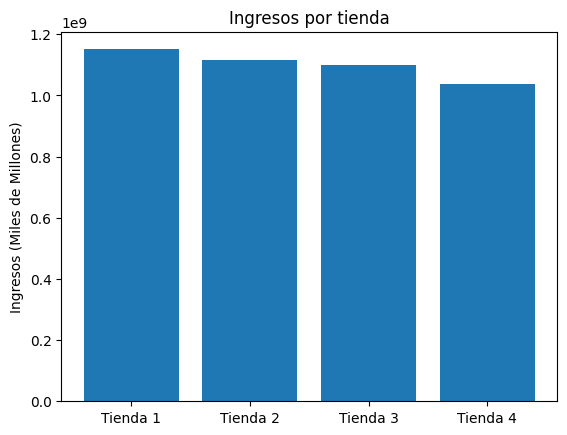

In [13]:
import matplotlib.pyplot as plt

nombres_tienda
ingresos_totales

tiendas_ingresos = pd.DataFrame({
    "tienda": nombres_tienda,
    "ingresos": ingresos_totales
})

plt.bar(tiendas_ingresos["tienda"], tiendas_ingresos["ingresos"])
plt.xlabel("")
plt.ylabel("Ingresos (Miles de Millones)")
plt.title("Ingresos por tienda")
plt.show()

In [14]:
type(tienda)

pandas.core.frame.DataFrame

# 2. Ventas por categoría

Se calculan los datos de ventas por categoría para cada tienda y se grafican

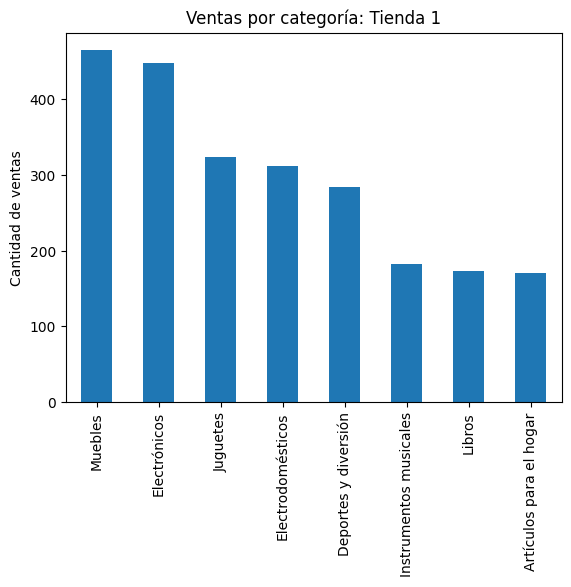

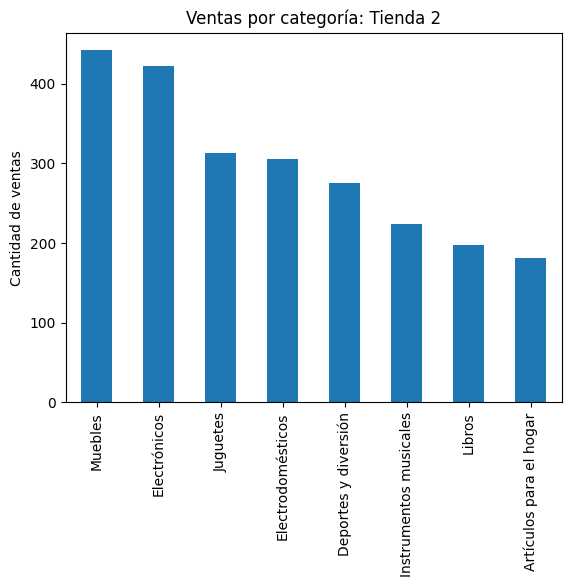

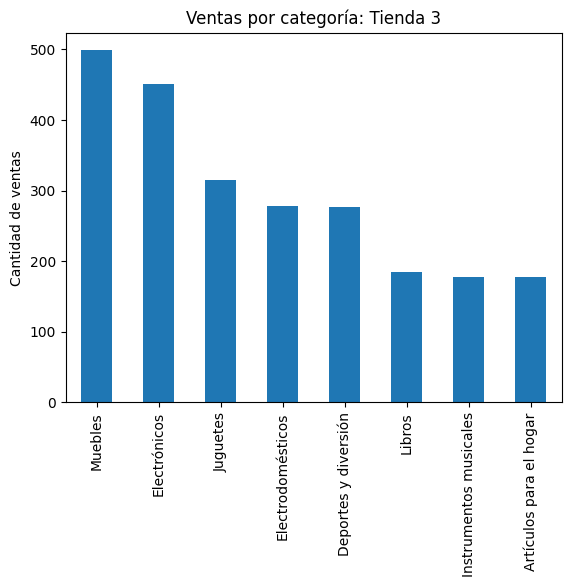

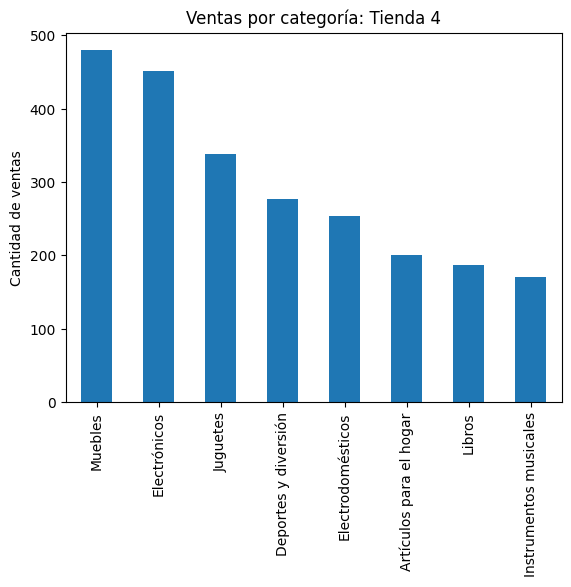

In [15]:
for tienda, nombre in zip(tiendas, nombres_tienda):
  ventas_por_categoria = tienda['Categoría del Producto'].value_counts()
  ventas_por_categoria.plot(kind = 'bar')
  plt.title(f'Ventas por categoría: {nombre}')
  plt.xlabel('')
  plt.ylabel('Cantidad de ventas')
  plt.show()

Se crea una lista de listas con los datos de ventas por categoría de cada tienda

In [36]:
ventas_por_categoria = []

for tienda, nombre in zip(tiendas, nombres_tienda):
    ventas_por_categoria_tienda = tienda['Categoría del Producto'].value_counts()
    ventas_por_categoria.append(ventas_por_categoria_tienda)

ventas_por_categoria

[Categoría del Producto
 Muebles                    465
 Electrónicos               448
 Juguetes                   324
 Electrodomésticos          312
 Deportes y diversión       284
 Instrumentos musicales     182
 Libros                     173
 Artículos para el hogar    171
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    442
 Electrónicos               422
 Juguetes                   313
 Electrodomésticos          305
 Deportes y diversión       275
 Instrumentos musicales     224
 Libros                     197
 Artículos para el hogar    181
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    499
 Electrónicos               451
 Juguetes                   315
 Electrodomésticos          278
 Deportes y diversión       277
 Libros                     185
 Instrumentos musicales     177
 Artículos para el hogar    177
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    480
 Electrónicos       

Se calculan los ingresos totales por categoría en general

In [48]:
ingresos_por_categoria = ventas_total.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ingresos_por_categoria = ingresos_por_categoria.rename(columns={'Precio': 'Ingresos'})

Se grafican los ingresos totales por categoría en general

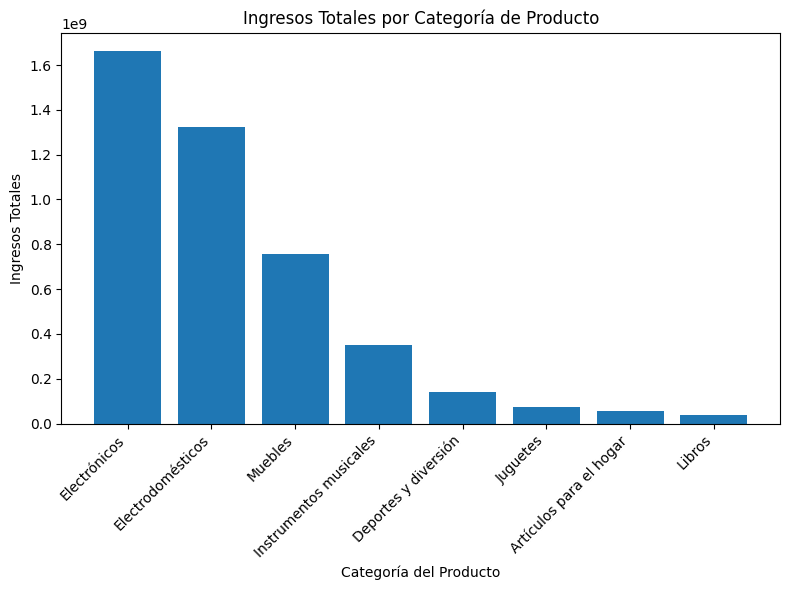

In [54]:
ingresos_por_categoria = ingresos_por_categoria.sort_values(by='Ingresos', ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(
    ingresos_por_categoria['Categoría del Producto'],
    ingresos_por_categoria['Ingresos']
)
plt.xlabel('Categoría del Producto')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


Se calculan los promedios de calificación por cada tienda y se introducen en una lista vacia.

In [16]:
promedios_calificacion = []

for tienda, nombre in zip(tiendas, nombres_tienda):
    promedio_calificacion_tienda = tienda['Calificación'].mean()
    promedios_calificacion.append(promedio_calificacion_tienda)
    print('La calificación media de la tienda %s, son %.2f' %(nombre, promedio_calificacion_tienda))

La calificación media de la tienda Tienda 1, son 3.98
La calificación media de la tienda Tienda 2, son 4.04
La calificación media de la tienda Tienda 3, son 4.05
La calificación media de la tienda Tienda 4, son 4.00


In [ ]:
print(promedios_calificacion)

[np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


Se grafican los datos de calificación por tienda

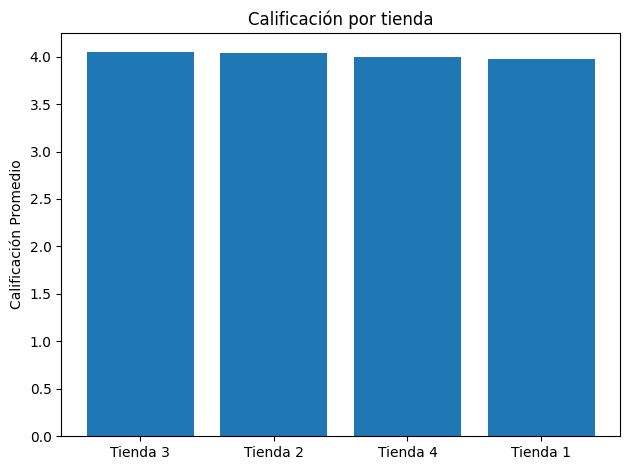

In [55]:
nombres_tienda
promedios_calificacion

tiendas_promedios_calificacion = pd.DataFrame({
    "tienda": nombres_tienda,
    "calificacion promedio": promedios_calificacion
})

tiendas_promedios_calificacion = tiendas_promedios_calificacion.sort_values(by='calificacion promedio', ascending=False)
plt.bar(tiendas_promedios_calificacion["tienda"], tiendas_promedios_calificacion["calificacion promedio"])
plt.xlabel("")
plt.ylabel("Calificación Promedio")
plt.title("Calificación por tienda")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Se crea un gráfico de barras con gradiente de color para identificar los porductos mas y menos vendidos a partir de los data frames de cada tienda

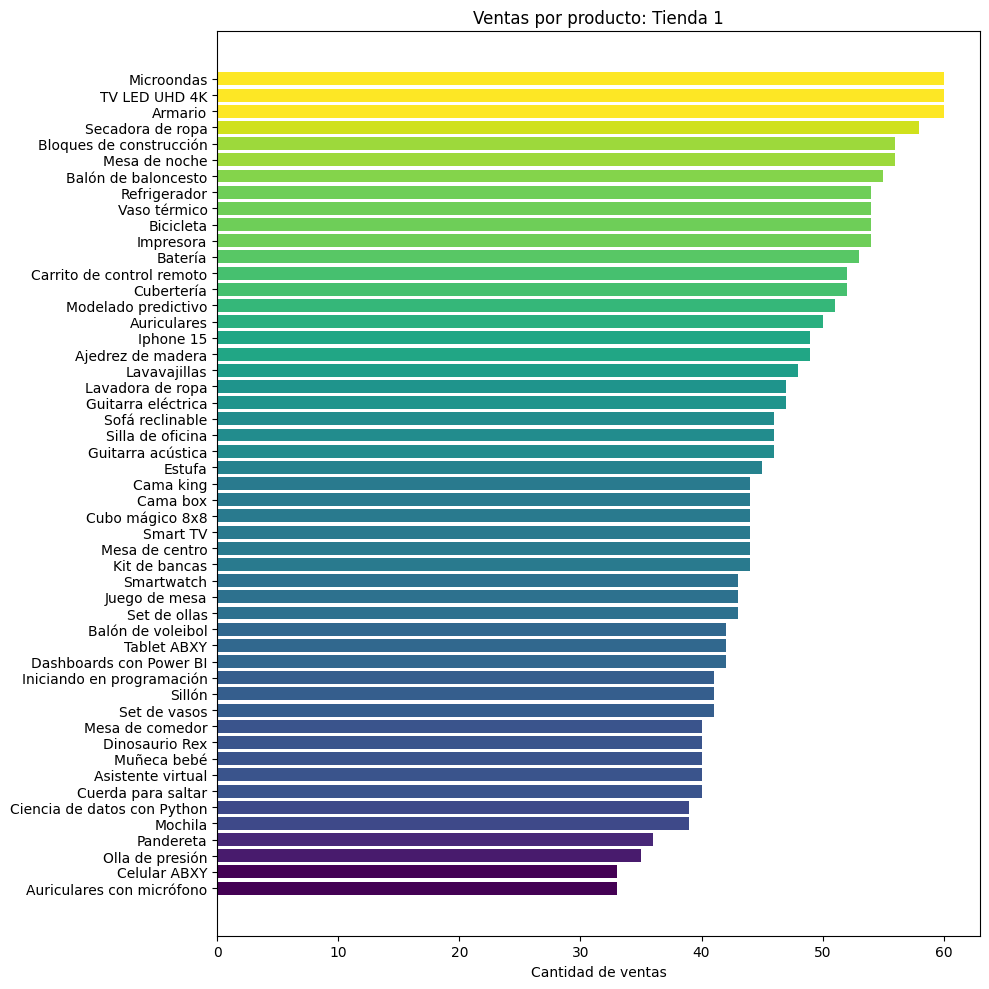

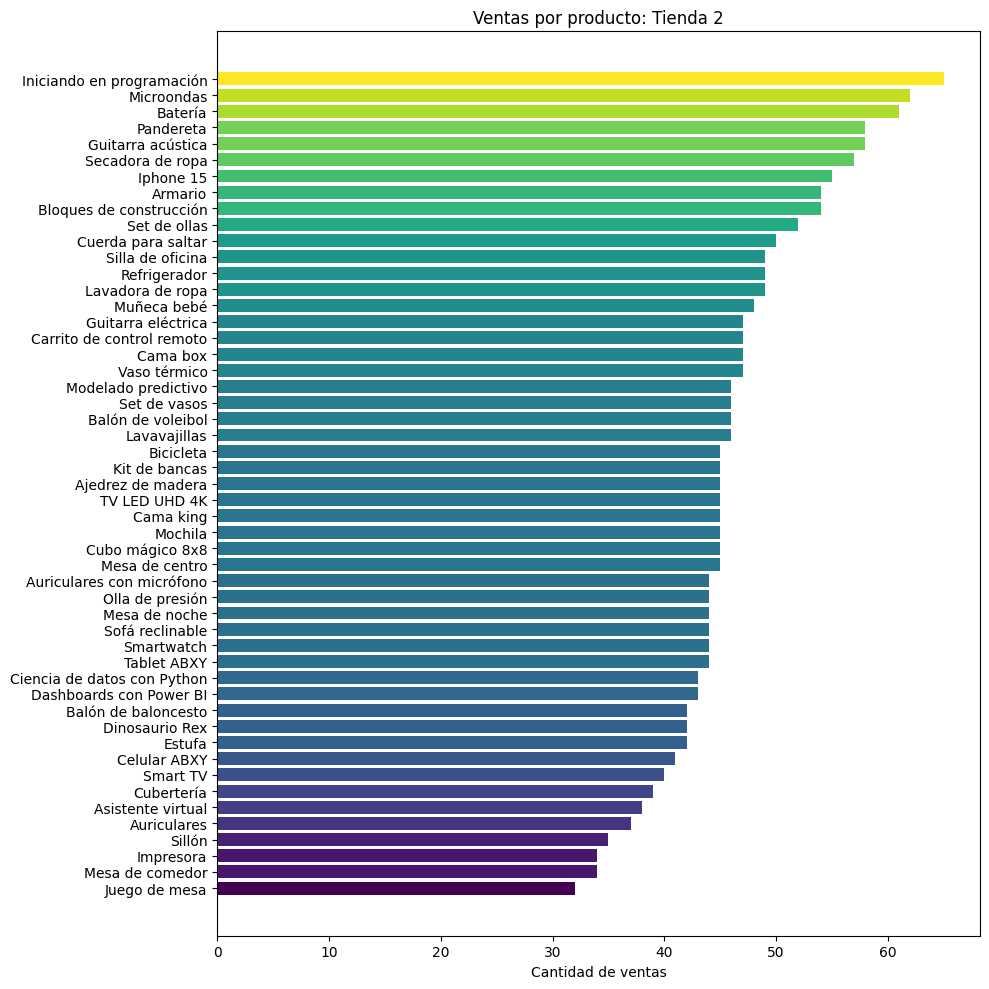

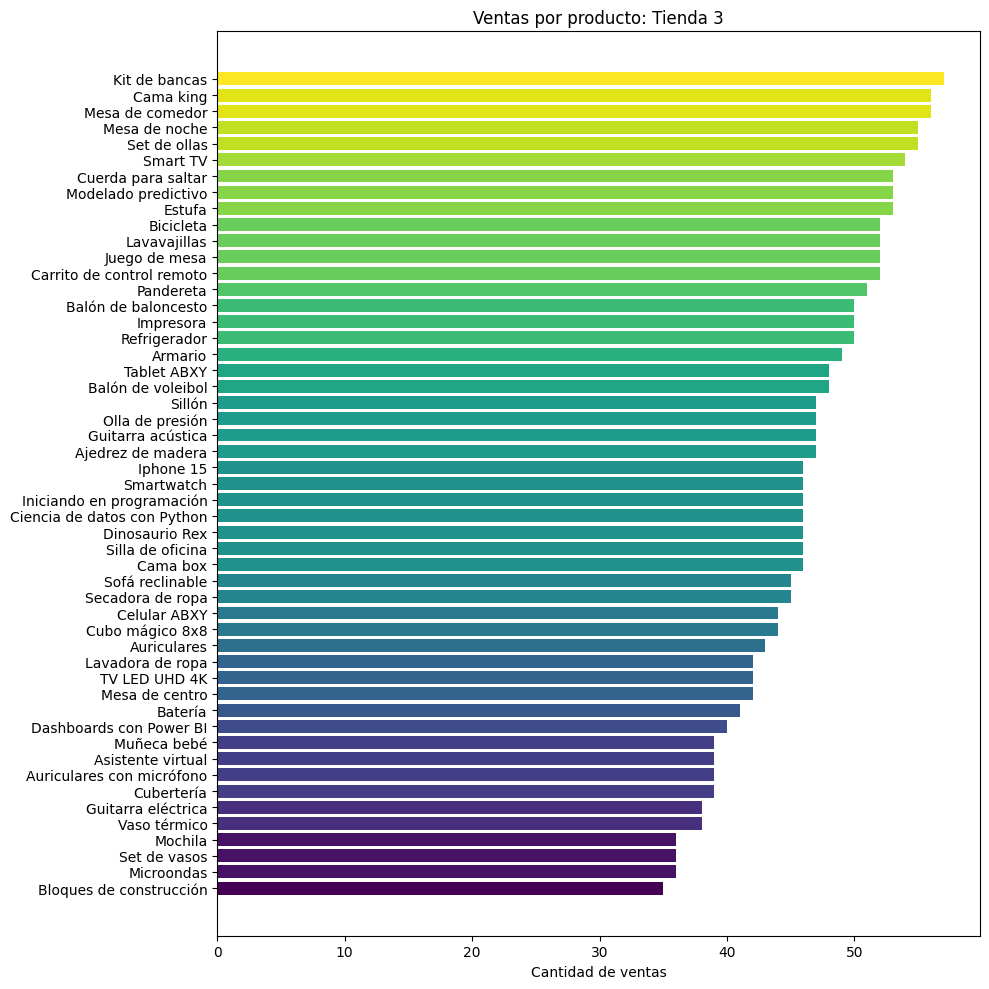

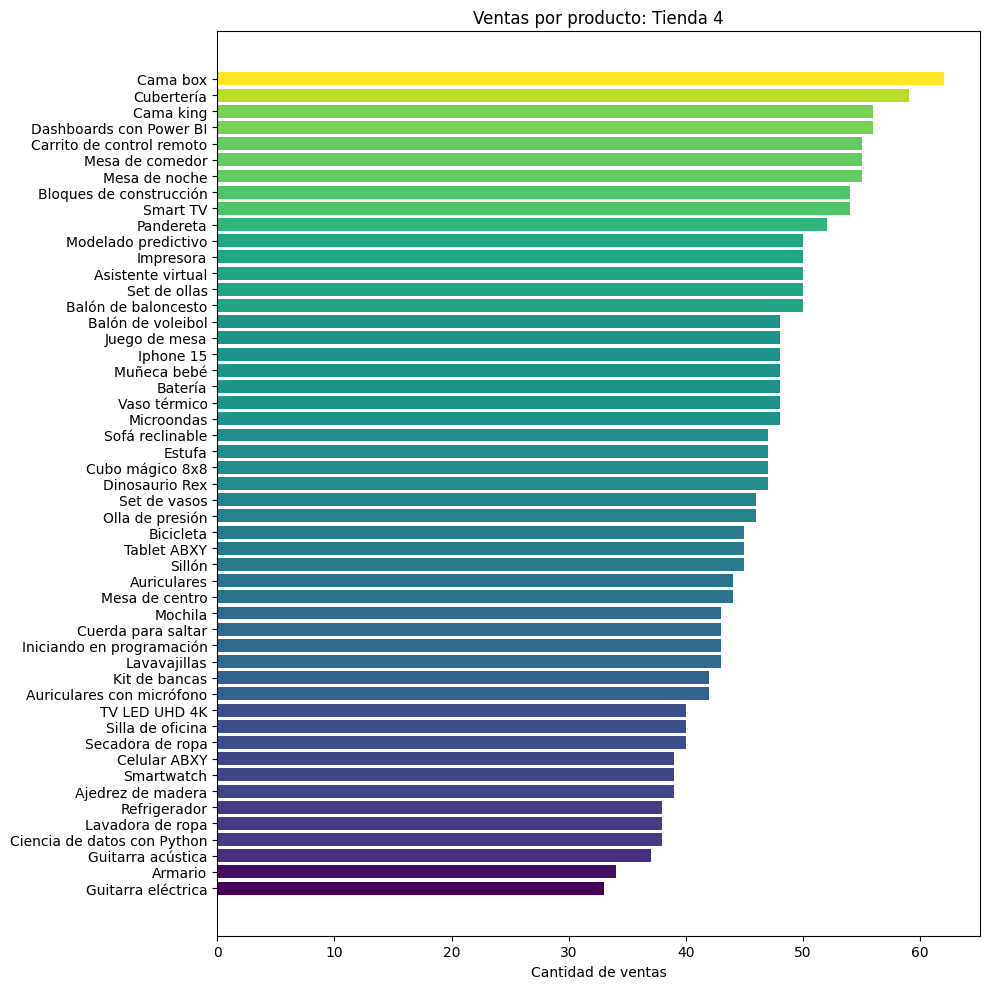

In [19]:
for tienda, nombre in zip(tiendas, nombres_tienda):
  ventas_por_producto = tienda['Producto'].value_counts().sort_values(ascending = True)

  norm = plt.Normalize(ventas_por_producto.min(), ventas_por_producto.max())
  colors = plt.cm.viridis(norm(ventas_por_producto.values))
  plt.figure(figsize=(10, 10))
  plt.barh(ventas_por_producto.index, ventas_por_producto.values, color = colors)
  plt.title(f'Ventas por producto: {nombre}')
  plt.xlabel('Cantidad de ventas')
  plt.ylabel('')
  plt.tight_layout()
  plt.show()

# 5. Envío promedio por tienda

Se calculan lso promedios de envío a partir del data frame de cada tienda y se introducen en una lista vacia

In [20]:
promedios_envio = []

for tienda, nombre in zip(tiendas, nombres_tienda):
    promedio_envio_tienda = tienda['Costo de envío'].mean()
    promedios_envio.append(promedio_envio_tienda)
    print('El costo medio de envio de la tienda %s, son %.2f' %(nombre, promedio_envio_tienda))

El costo medio de envio de la tienda Tienda 1, son 26018.61
El costo medio de envio de la tienda Tienda 2, son 25216.24
El costo medio de envio de la tienda Tienda 3, son 24805.68
El costo medio de envio de la tienda Tienda 4, son 23459.46


In [21]:
promedios_envio

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

Se grafican los envíos promedio de cada tienda a partir de una data frame que agrupa los promedios e identificadores de cada tienda

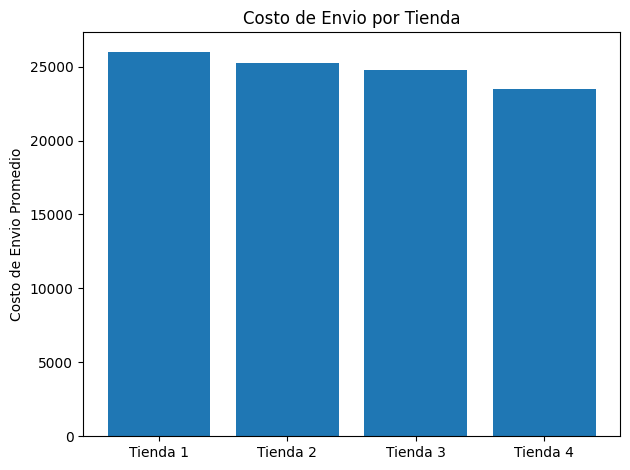

In [22]:
nombres_tienda
promedios_envio

tiendas_promedios_envio = pd.DataFrame({
    "tienda": nombres_tienda,
    "envio promedio": promedios_envio
})

plt.bar(tiendas_promedios_envio["tienda"], tiendas_promedios_envio["envio promedio"])
plt.xlabel("")
plt.ylabel("Costo de Envio Promedio")
plt.title("Costo de Envio por Tienda")
plt.tight_layout()
plt.show()

Se calcula el envio total de a partir de los data frames de cada tienda y se introducen los datos resultantes en una lista vacía

In [57]:
envio_total = []

for tienda, nombre in zip(tiendas, nombres_tienda):
    envio_tienda = tienda['Costo de envío'].sum()
    envio_total.append(envio_tienda)

envio_total

[np.float64(61377900.0),
 np.float64(59485100.0),
 np.float64(58516600.0),
 np.float64(55317400.0)]

Se calcula la proporción del costo total de envío de cada tienda con respoecto a sus ingresos totales para cada tienda

In [68]:
envio_total
ingresos_totales

for ingreso, envio in zip(ingresos_totales, envio_total):
  print((envio/ingreso)*100)

5.333125840009092
5.328565983498806
5.329285561022772
5.327301091502815


# 6. Análisis Geográfico

Se cuentan las ventas por lugar de compra para cada tienda y se grafican

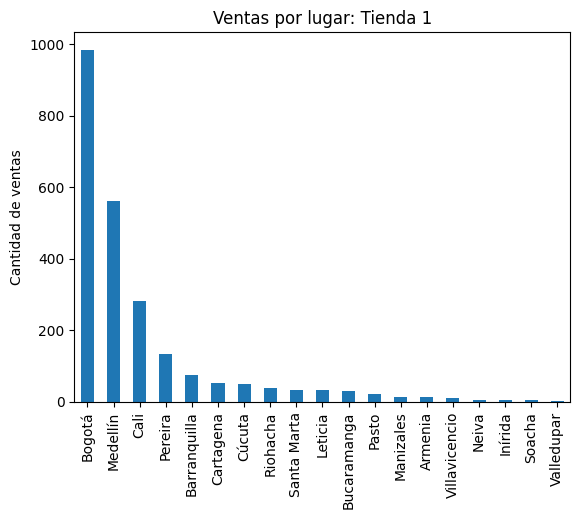

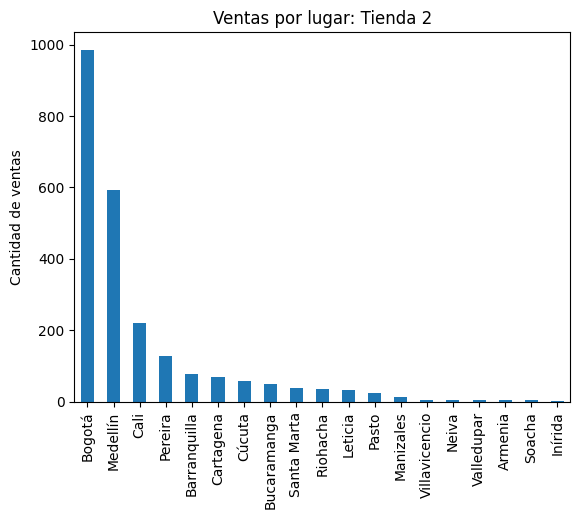

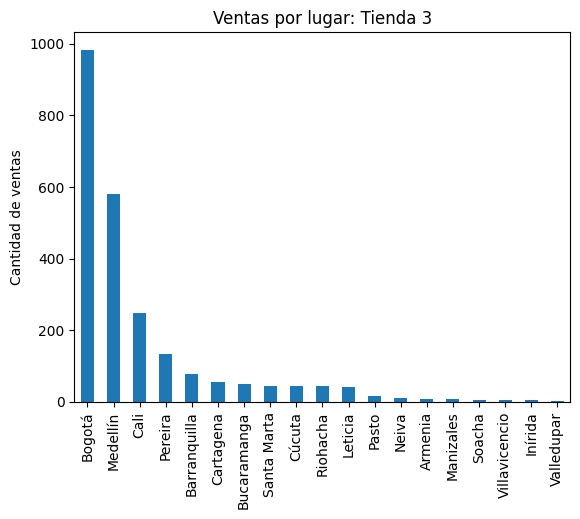

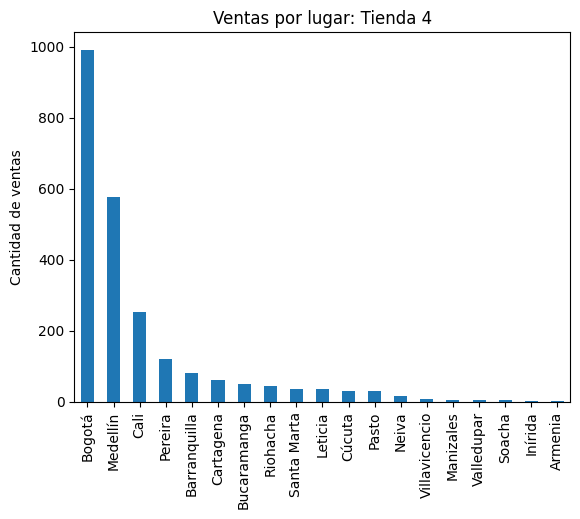

In [23]:
for tienda, nombre in zip(tiendas, nombres_tienda):
  ventas_por_lugar = tienda['Lugar de Compra'].value_counts()
  ventas_por_lugar.plot(kind = 'bar')
  plt.title(f'Ventas por lugar: {nombre}')
  plt.xlabel('')
  plt.ylabel('Cantidad de ventas')
  plt.show()

Se crea un mapa de calor que representa la concentración de ventas por ubicación geográfica

In [70]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[4.6, -74], zoom_start=5)

puntos = ventas_total[['lat', 'lon']].values.tolist()

HeatMap(puntos, radius=12).add_to(mapa)

mapa

In [27]:
ventas_total['lat_round'] = ventas_total['lat'].round(2)
ventas_total['lon_round'] = ventas_total['lon'].round(2)

zona_agrupada = ventas_total.groupby(['lat_round', 'lon_round']).agg({
    'Precio': 'sum',
    'Calificación': 'mean',
    'Costo de envío': 'mean',
    'tienda': 'count'  # número de ventas
}).reset_index().rename(columns={
    'Precio': 'Ingresos',
    'Calificación': 'CalificacionProm',
    'Costo de envío': 'CostoEnvioProm',
    'tienda': 'CantidadVentas'
})

Se hace un diagrama de dispersión que representa la relación entre la latitud y longitud (ejes x e y), el nivel de igresos por ubicación geográfica (tamaño) y la califiación promedio (gradiente de color)

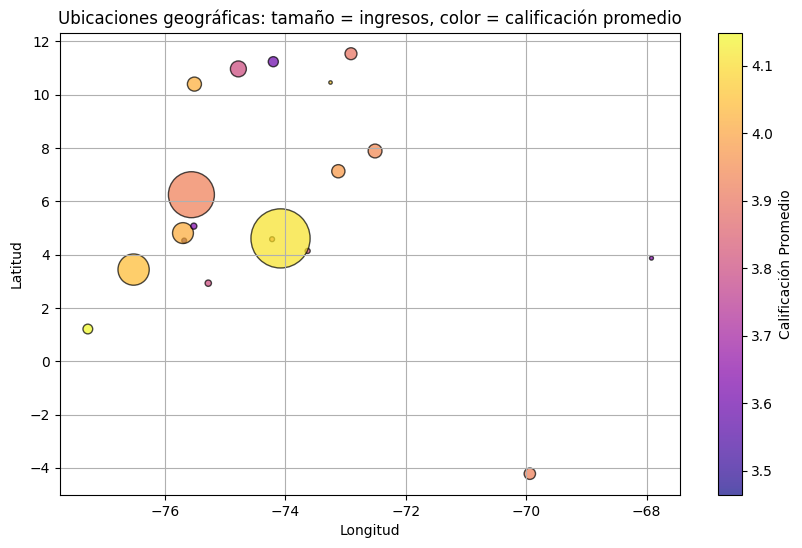

In [28]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    zona_agrupada['lon_round'],
    zona_agrupada['lat_round'],
    s=zona_agrupada['Ingresos'] / 1e6,  # Escalar ingresos para tamaño
    c=zona_agrupada['CalificacionProm'],
    cmap='plasma',
    alpha=0.7,
    edgecolors='black'
)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones geográficas: tamaño = ingresos, color = calificación promedio')
plt.colorbar(scatter, label='Calificación Promedio')
plt.grid(True)

plt.show()

#8. Informe Final


<h2> Análisis de Facturación


La tienda que más genera ingresos es la 1, con una facturación total aproximada de 1.15 miles de millones de pesos (MM), seguida de la tienda 2 con una facturación total aproximada de 1.12 MM, la tienda 3 facturó un total aproximado de 1.09 MM y por ultimo la tienda 4, es la que menos facturó de todas con un total aproximado de 1.03 MM. Como se muestra en el siguiente gráfico.

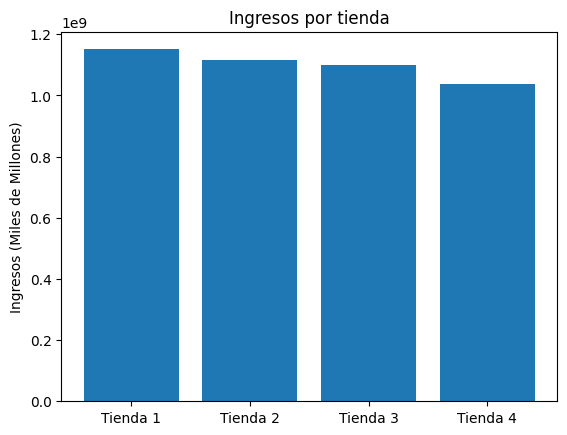

<h2> Ventas por Categoría

Para la tienda 1, se observa que las categoría de producto más vendidas son:


1.    Muebles                    465
2.    Electrónicos               448
3.    Juguetes                   324
4.    Electrodomésticos          312

Y las menos vendidas:

1. Deportes y diversión       284
2. Instrumentos musicales     182
3. Libros                     173
4. Artículos para el hogar    171


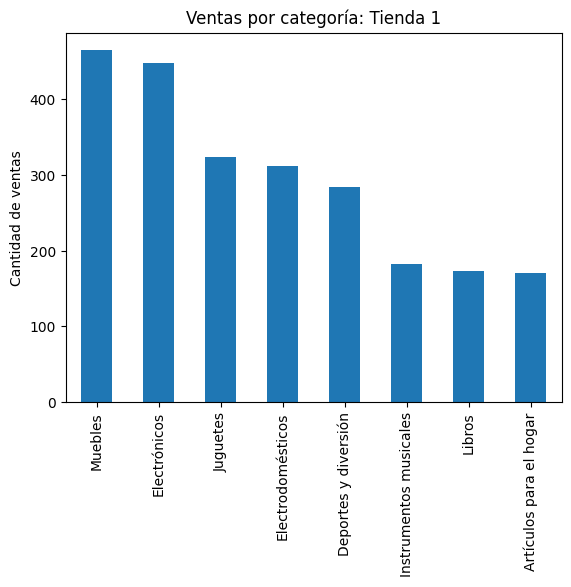

Para la tienda 2, se observa que las categoría de producto más vendidas son:

1. Muebles                    442
2. Electrónicos               422
3. Juguetes                   313
4. Electrodomésticos          305


Y las menos vendidas:

5.  Deportes y diversión       275
6.  Instrumentos musicales     224
7.  Libros                     197
8.  Artículos para el hogar    181

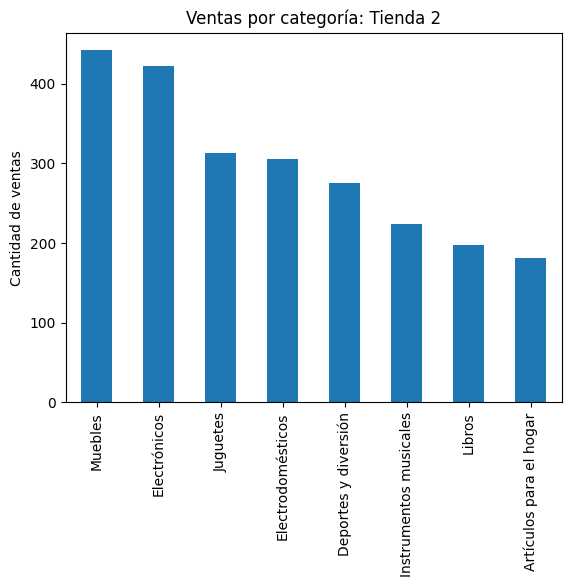

Para la tienda 3, se observa que las categoría de producto más vendidas son:

1. Muebles                    499
2. Electrónicos               451
3. Juguetes                   315
4. Electrodomésticos          278

Y las menos vendidas:

5.  Deportes y diversión       277
6.  Libros                     185
7.  Instrumentos musicales     177
8.  Artículos para el hogar    177

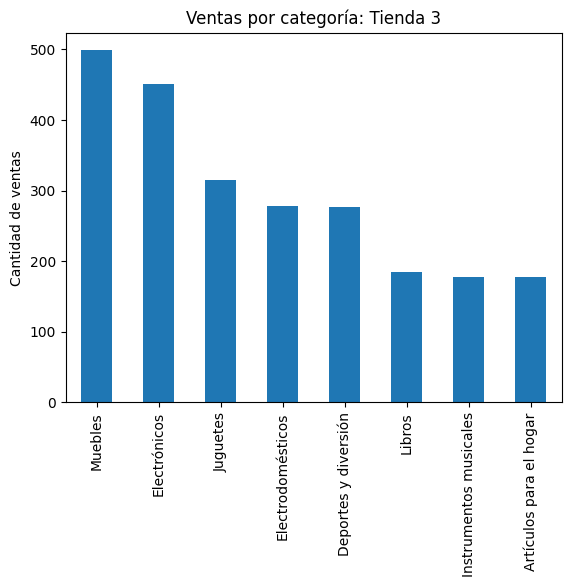

Para la tienda 4, se observa que las categoría de producto más vendidas son:

1. Muebles                    480
2. Electrónicos               451
3. Juguetes                   338
4. Deportes y diversión       277

Y las menos vendidas:

5.  Electrodomésticos          254
6.  Artículos para el hogar    201
7.  Libros                     187
8.  Instrumentos musicales     170

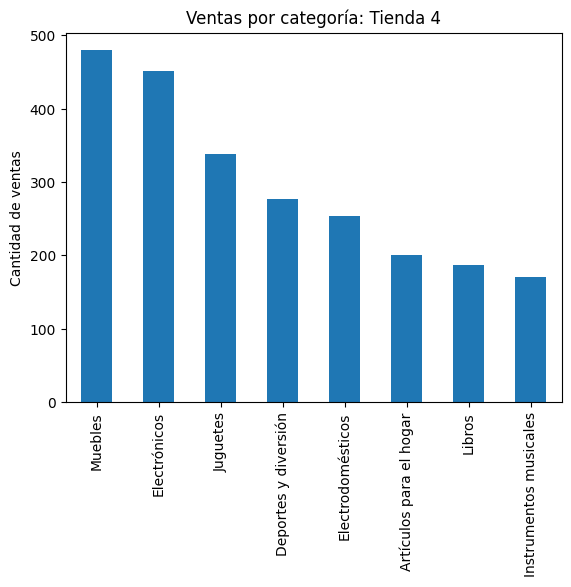

A continuación se muestra la concentración de ventas totales por categoría. Es evidente que los productos que más generan ingresos son los electrónicos, seguidos de los electrodomésticos y en una proporción significativamente menos los muebles, y las demás categorías.

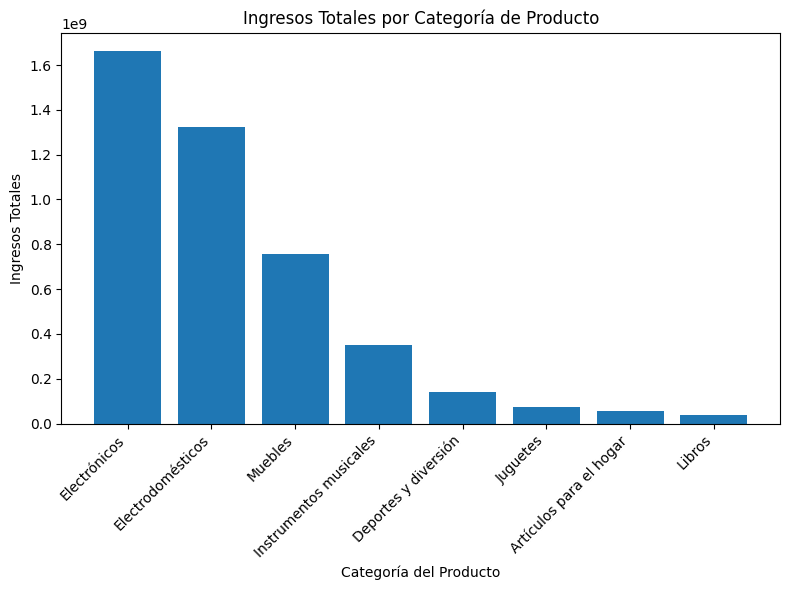

Cada una de las tiendas muestra un comportamiento similar al concentrar sus ventas en 3 categorías: Muebles, electrónicos y juguetes. Sin embargo, la tienda 4 vende una proporción menor de electrodomésticos en comparación a las demás tiendas, esta es una razón de su desempeño inferior.

<h2> Calificación Promedio de la tienda

Si bien, las tiendas tienen una calificación muy similar, al rededor de 4; se resalta que las tiendas con menor calificación, son las tiendas 4 y 1, respectivamente, cuya puntuación se encuentra sobre el rango del 3. A diferencia de la tienda 4, la tienda 1 logra mantenerse como la mejor en facturación a pesar de su calificación.

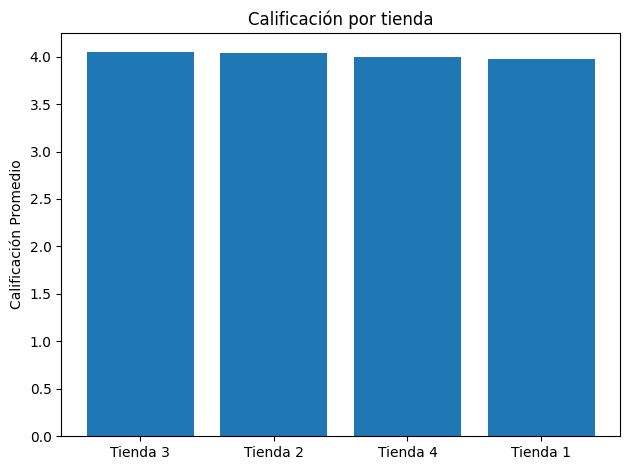

<h2> Productos más y menos vendidos

De una manera más desagregada a continuación se pueden visualizar los datos de ventas por producto para cada una de las tiendas, organizados de mayor a menor y con un gradiente que muestra con colores mas intensos (amarillo), los productos mas vendidos y con colores fríos (morado), los productos menos vendidos.

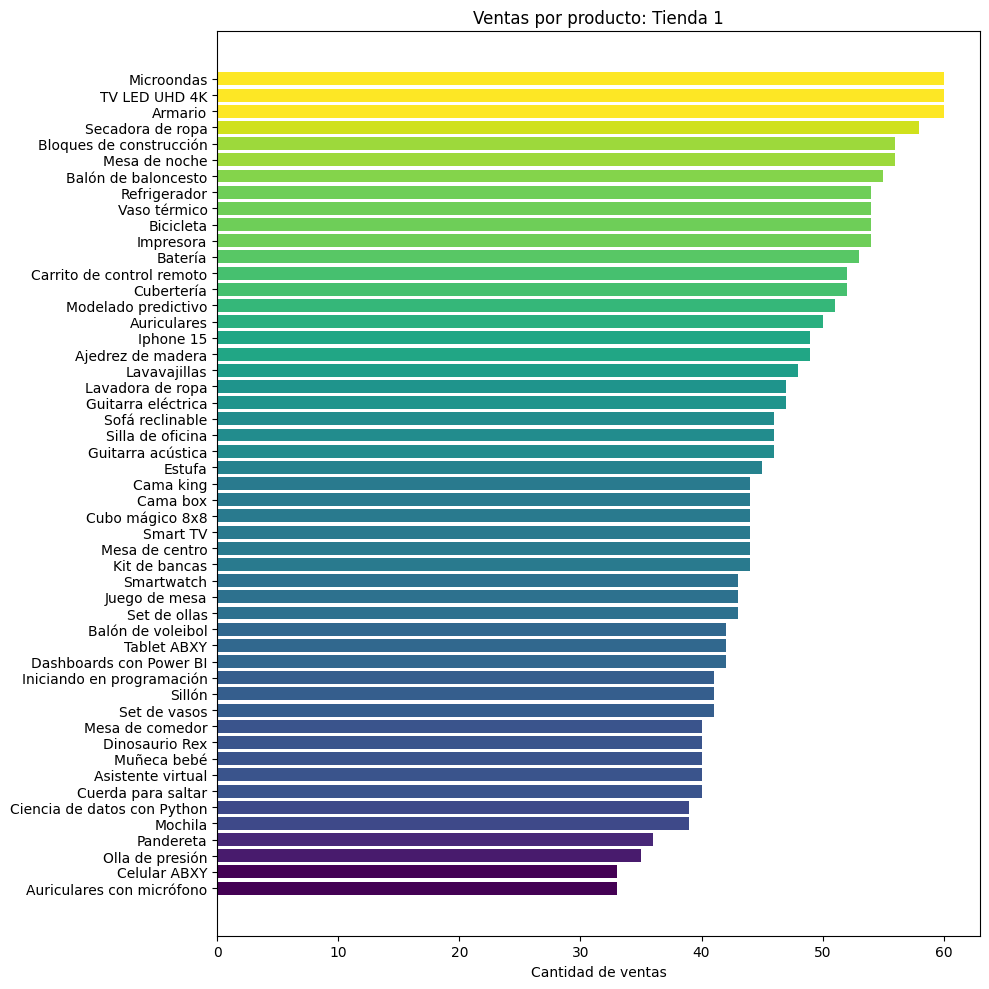

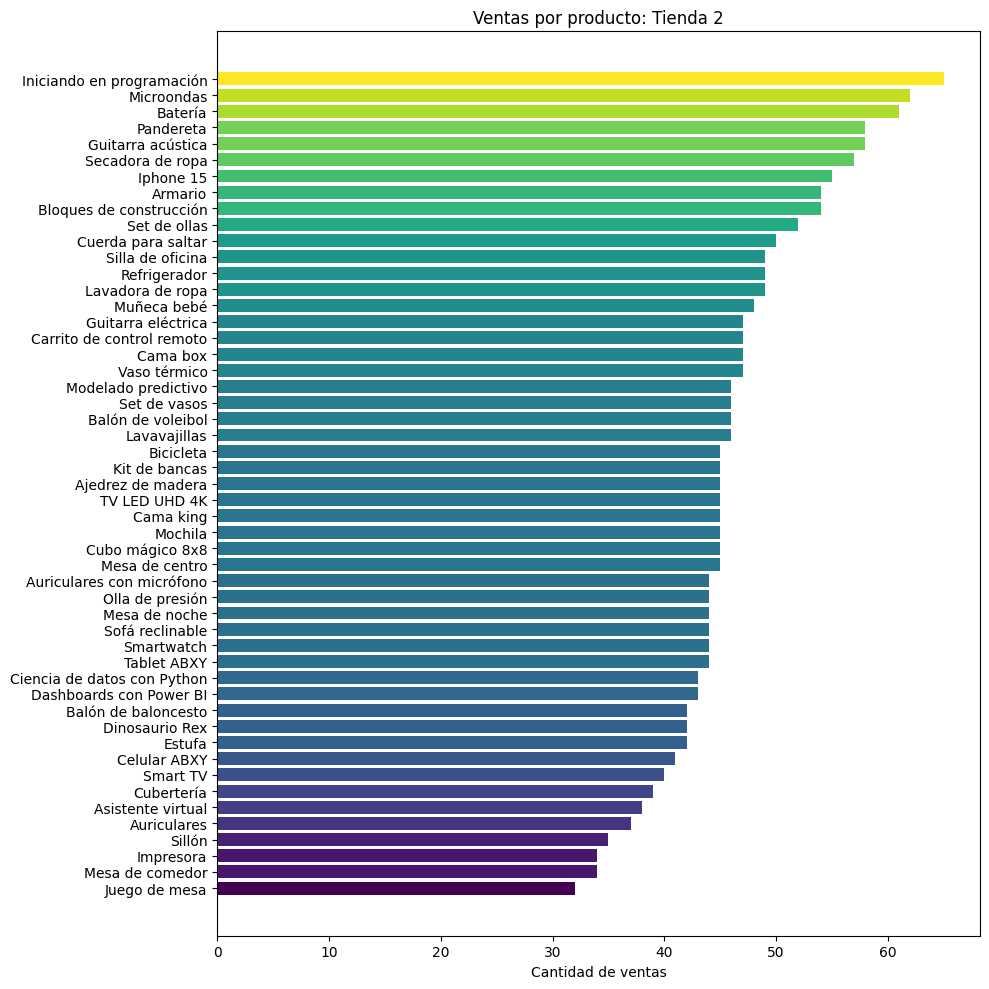

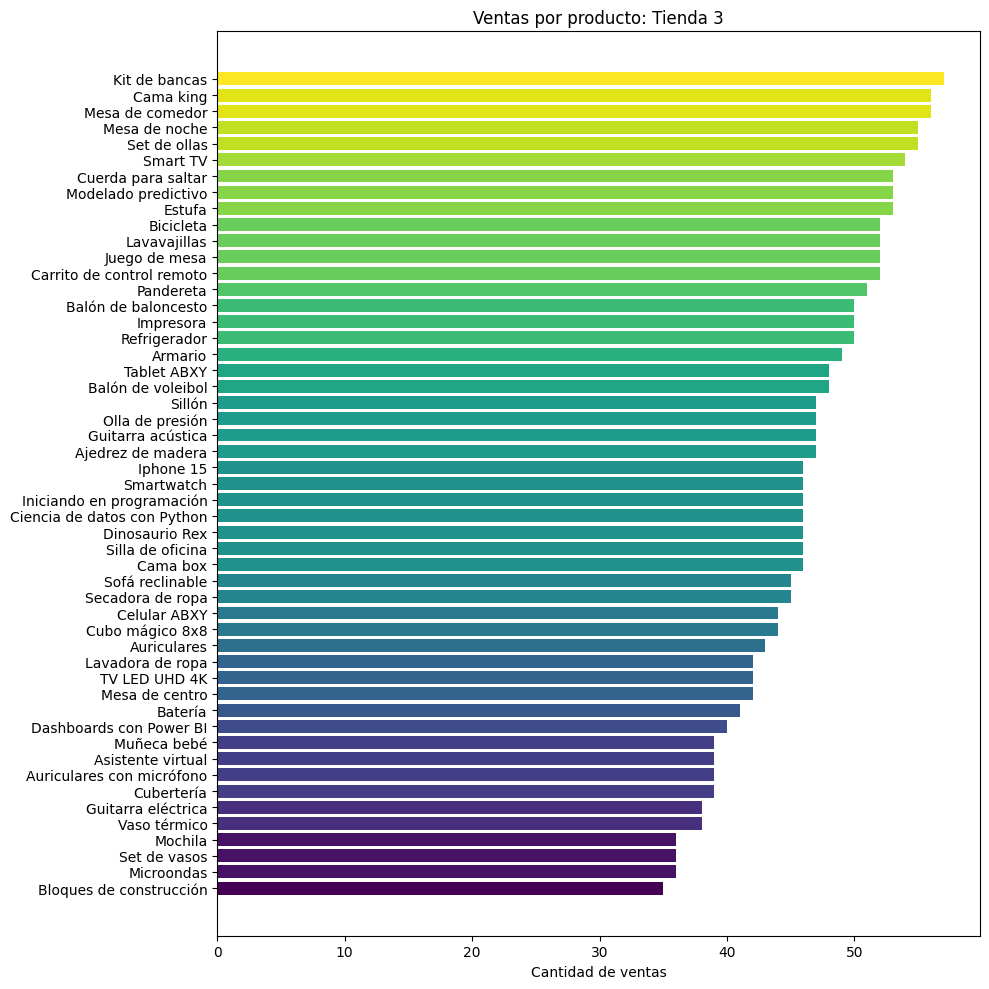

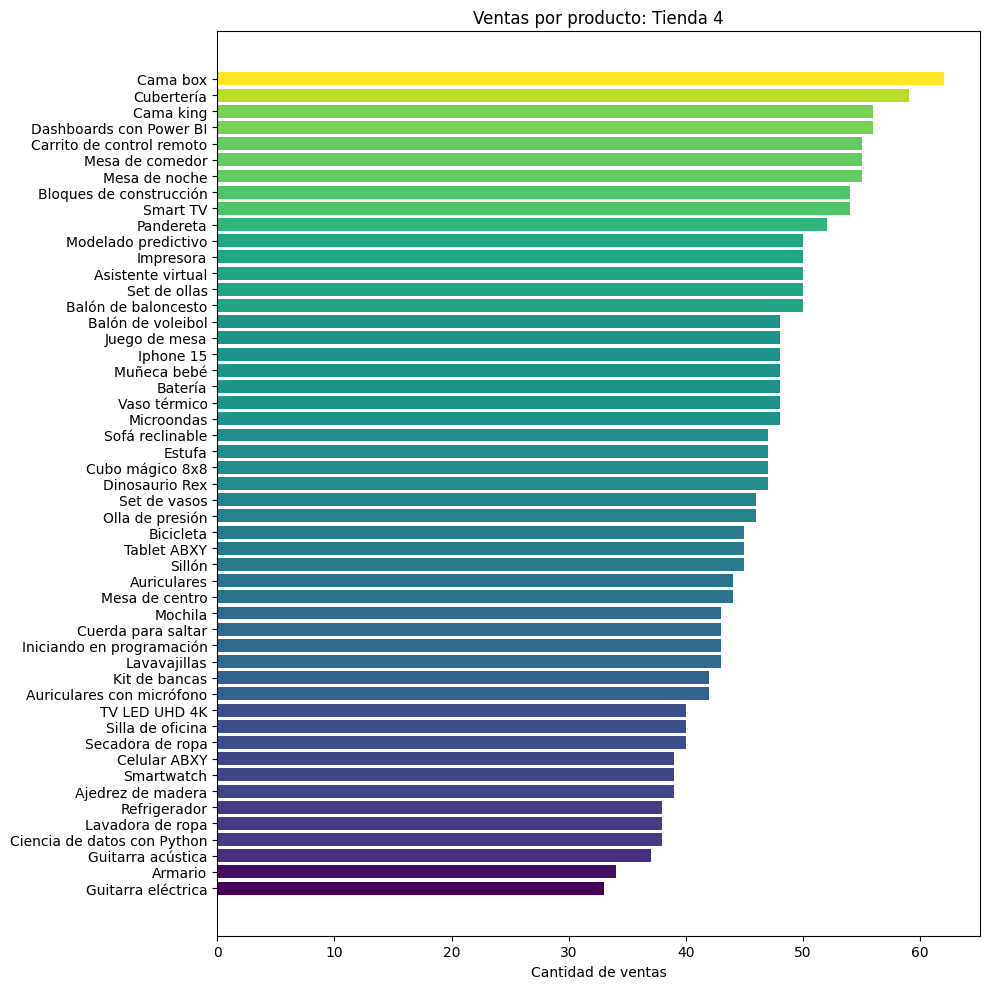

Se destaca que el gradiente de la tienda 2 y 4 pasa muy rápido a colores fríos, lo que es un indicador de baja diversificación de ventas en comparación con las
tiendas 1 y 3 que poseen una buena cantidad de productos identificados con colores intensos.

<h2> Costo de envío promedio por tienda

Se observa que el costo envío promedio de la tienda 1 es más alto en comparación que las demás tiendas, en particular de la tienda 4 que es la que presenta un costo de envío más bajo. Sin embargo al calcular el ratio (Costo de envío total / ingreso total), para cada tienda, no se obtienen diferencias significativas, el costo de envío como proporción del ingreso se mantiene al rededor de 5.3%.

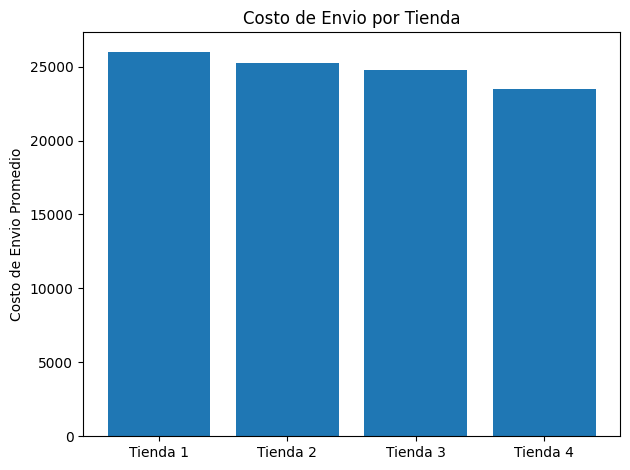

<h2> Análisis geográfico


En general la ventas se concentran en las grandes ciudades y centros poblados del país, se destacan las ventas en Bogotá , Medellín y Cali respectivamente. Hay una relación evidente entre el tamaño de la población y las ventas. Es por esta razón que las campañas de marketing deben ser segmentadas para las personas de las grandes ciudades.

In [69]:
mapa = folium.Map(location=[4.6, -74], zoom_start=5)

puntos = ventas_total[['lat', 'lon']].values.tolist()

HeatMap(puntos, radius=12).add_to(mapa)

mapa

Adicionalmente se observa que la calificación de las tiendas mejora significativamente en la ciudad de Bogotá, aunque se destacan buenas calificaciones en ciudades como Cali; Se observan calificaciones inferiores para ubicaciones alejadas del centro del país, como la Costa Caribe, y de manera atípica, en la ciudad de Medellín

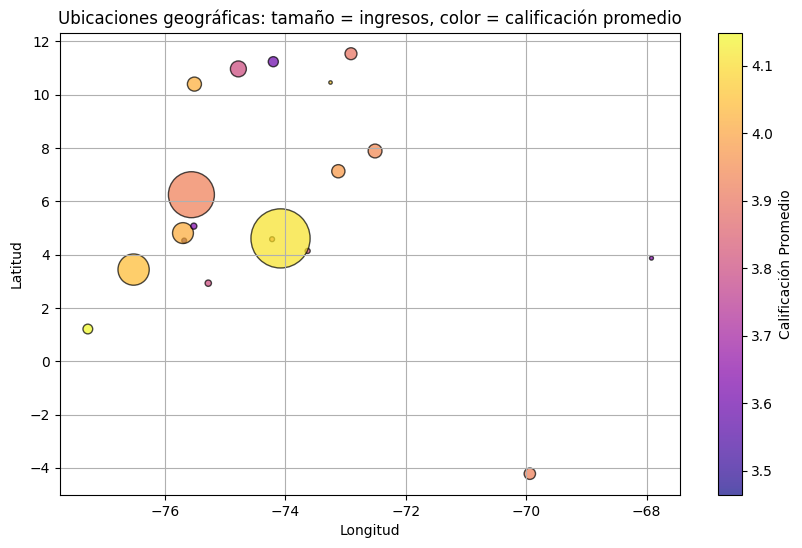

<h1> Conclusión

En general las ventas se concentran en las ciudades de mayor población como Bogotá, Cali y Medellín, por lo que se recomienda concentrar la atención en clientes potenciales de estas ubicaciones geográficas. A demás, son evidentes las diferencias geográficas en cuanto a calificación de las tiendas se refiere, pues estas disminuyen cuando la ubicación se aleja del centro del país, por lo que es necesario hacer un análisis mas exhaustivo de las ventas en la costa Atlántica, Santander, Vichada o de forma atípica, Medellín; para determinar la causa de la disminución en la calificación.

De forma partícular, se destaca el desempeño de la tienda 1 al tener el mayor volumen de ingresos, una una proporción baja de los costos de envío, una concentración de las ventas en categorías ampliamente demandadas en el mercado y una diversificación saludable de ventas por producto; aunque con la calificación mas baja. La tienda 2 posee el segundo mejor nivel de ingresoal igual que la segunda mejor calificación, pero tiene una baja diversificación de productos en sus ventas. La tienda 3 se destaca al tener la mayor calificación promedio y se mantiene como un caso intermedio en los demás indicadores. En contraste la tienda 4 es la que menores ingresos registra, se le dificulta vender en categorias de alta demanda y la diversificación de ventas por productos es inferior. Por las razones anteriormente mencionadas se determina que la tienda 4 presenta los niveles mas bajos de eficiencia y debe ser la primera en tomarse en consideración al estudiar una desición de venta.